# 1) Data Preparation

In [1]:
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("airlines.csv")

In [6]:
df

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,dissatisfied,Loyal Customer,28,Personal Travel,Business,3849,3,5,3,5,...,3,3,5,2,3,1,1,3,0,0.0
1,satisfied,Loyal Customer,15,Personal Travel,Eco,2060,3,3,3,3,...,5,4,5,3,5,3,4,4,0,0.0
2,dissatisfied,disloyal Customer,37,Business travel,Business,854,1,1,1,1,...,1,5,3,4,4,4,4,5,0,0.0
3,satisfied,Loyal Customer,58,Personal Travel,Eco,1146,5,5,5,5,...,5,4,4,4,4,3,4,3,88,71.0
4,satisfied,Loyal Customer,17,Business travel,Business,4909,3,3,3,3,...,4,4,2,5,2,3,2,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,satisfied,Loyal Customer,30,Business travel,Business,1709,1,5,1,1,...,5,5,3,4,5,4,4,5,0,10.0
49996,dissatisfied,Loyal Customer,42,Business travel,Eco,1642,3,4,4,4,...,3,3,3,2,4,2,4,3,23,38.0
49997,dissatisfied,disloyal Customer,26,Business travel,Eco Plus,3280,1,1,1,4,...,4,4,2,5,2,4,4,4,20,0.0
49998,satisfied,Loyal Customer,59,Personal Travel,Eco,817,3,3,3,3,...,1,4,4,4,5,5,4,4,0,0.0


In [7]:
print("Dataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   satisfaction                       50000 non-null  object 
 1   Customer Type                      50000 non-null  object 
 2   Age                                50000 non-null  int64  
 3   Type of Travel                     50000 non-null  object 
 4   Class                              50000 non-null  object 
 5   Flight Distance                    50000 non-null  int64  
 6   Seat comfort                       50000 non-null  int64  
 7   Departure/Arrival time convenient  50000 non-null  int64  
 8   Food and drink                     50000 non-null  int64  
 9   Gate location                      50000 non-null  int64  
 10  Inflight wifi service              50000 non-null  int64  
 11  Inflight entertainment             50000

In [8]:
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   satisfaction      Customer Type  Age   Type of Travel     Class  \
0  dissatisfied     Loyal Customer   28  Personal Travel  Business   
1     satisfied     Loyal Customer   15  Personal Travel       Eco   
2  dissatisfied  disloyal Customer   37  Business travel  Business   
3     satisfied     Loyal Customer   58  Personal Travel       Eco   
4     satisfied     Loyal Customer   17  Business travel  Business   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0             3849             3                                  5   
1             2060             3                                  3   
2              854             1                                  1   
3             1146             5                                  5   
4             4909             3                                  3   

   Food and drink  Gate location  ...  Online support  Ease of Online booking  \
0               3              5  ...               3   

In [9]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                Age  Flight Distance  Seat comfort  \
count  50000.000000     50000.000000  50000.000000   
mean      39.411080      1983.972860      2.839840   
std       15.112934      1024.320581      1.391383   
min        7.000000        50.000000      0.000000   
25%       27.000000      1364.000000      2.000000   
50%       40.000000      1927.000000      3.000000   
75%       51.000000      2546.000000      4.000000   
max       85.000000      6950.000000      5.000000   

       Departure/Arrival time convenient  Food and drink  Gate location  \
count                       50000.000000     50000.00000   50000.000000   
mean                            2.990700         2.85044       2.984960   
std                             1.526152         1.44262       1.306571   
min                             0.000000         0.00000       0.000000   
25%                             2.000000         2.00000       2.000000   
50%                             3.000000  

In [10]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             163
dtype: int64


In [11]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace=True)

In [12]:
import matplotlib.pyplot as plt

In [13]:
import seaborn as sns

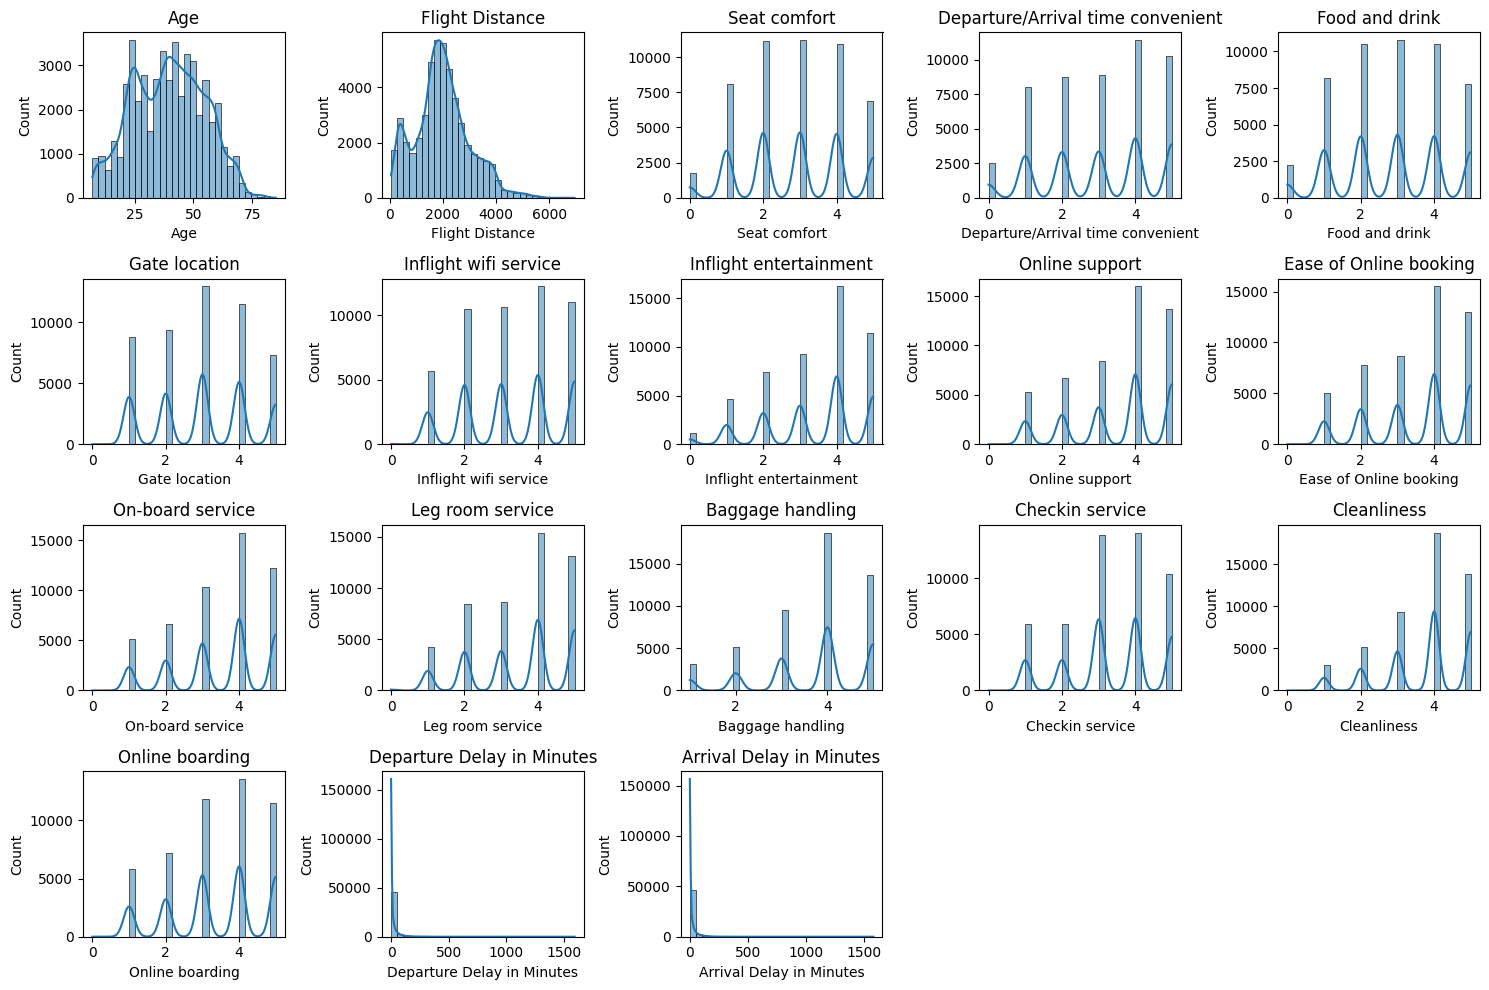

In [14]:
num_cols = df.select_dtypes(include=["number"]).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 5, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

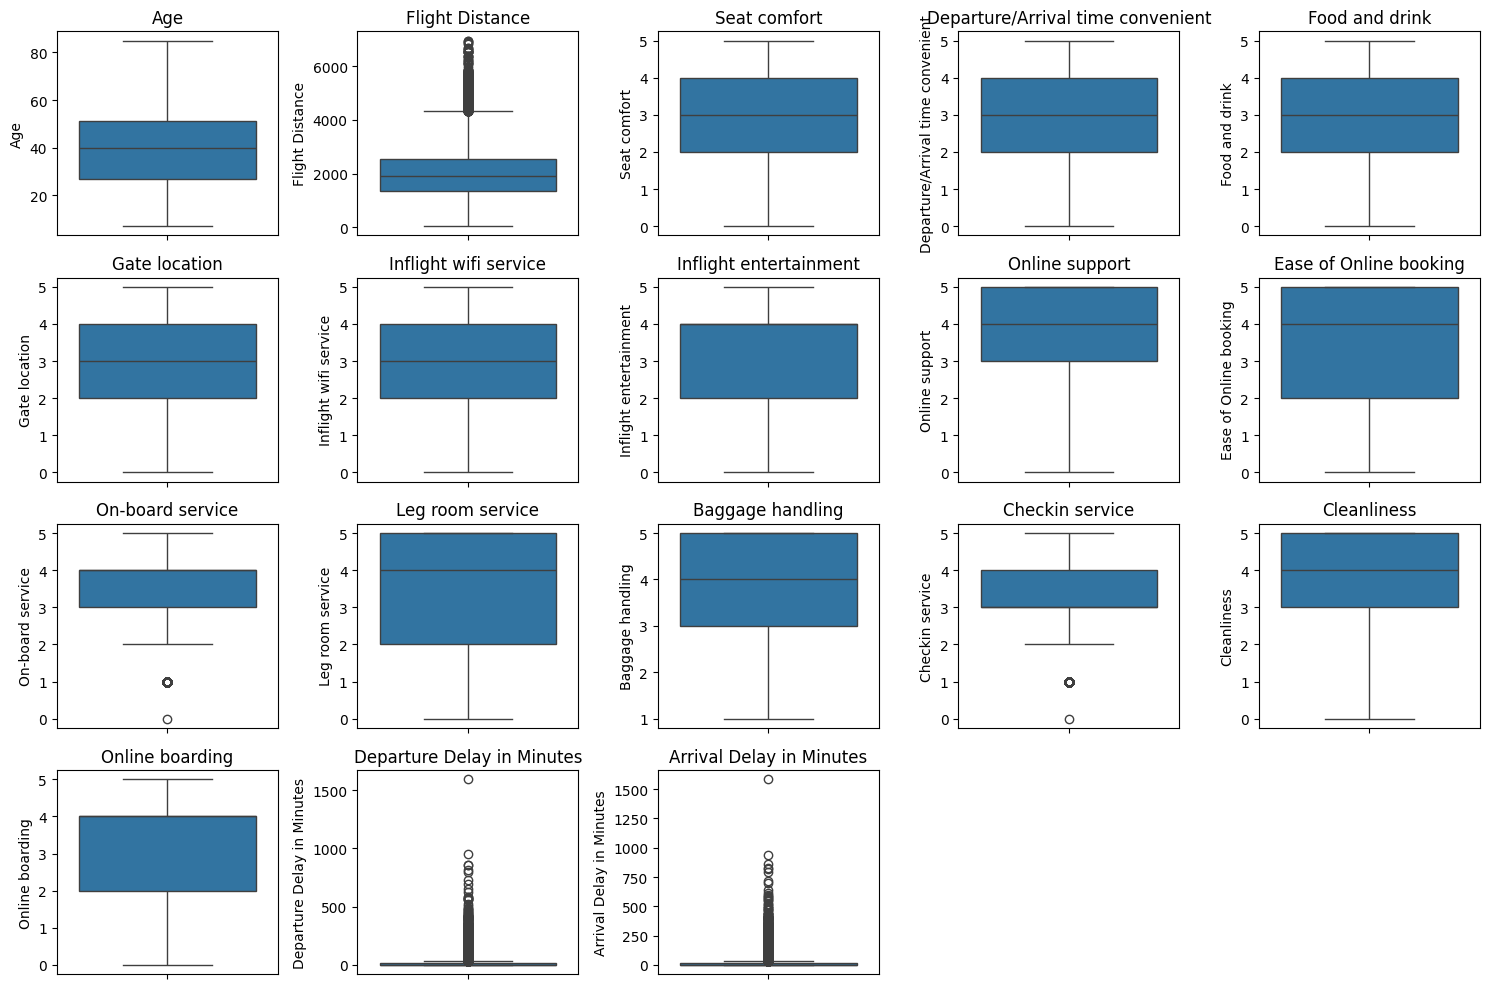

In [15]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [16]:
import warnings

In [17]:
warnings.filterwarnings('ignore')

## Encoding Categorical Variables

In [18]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [19]:
le = LabelEncoder()

In [20]:
df.columns

Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [21]:
df['satisfaction'] = le.fit_transform(df['satisfaction']) 

In [22]:
df['Customer Type'] = le.fit_transform(df['Customer Type'])

In [23]:
df['Type of Travel'] = le.fit_transform(df['Type of Travel'])

In [24]:
df['Class'] = le.fit_transform(df['Class'])

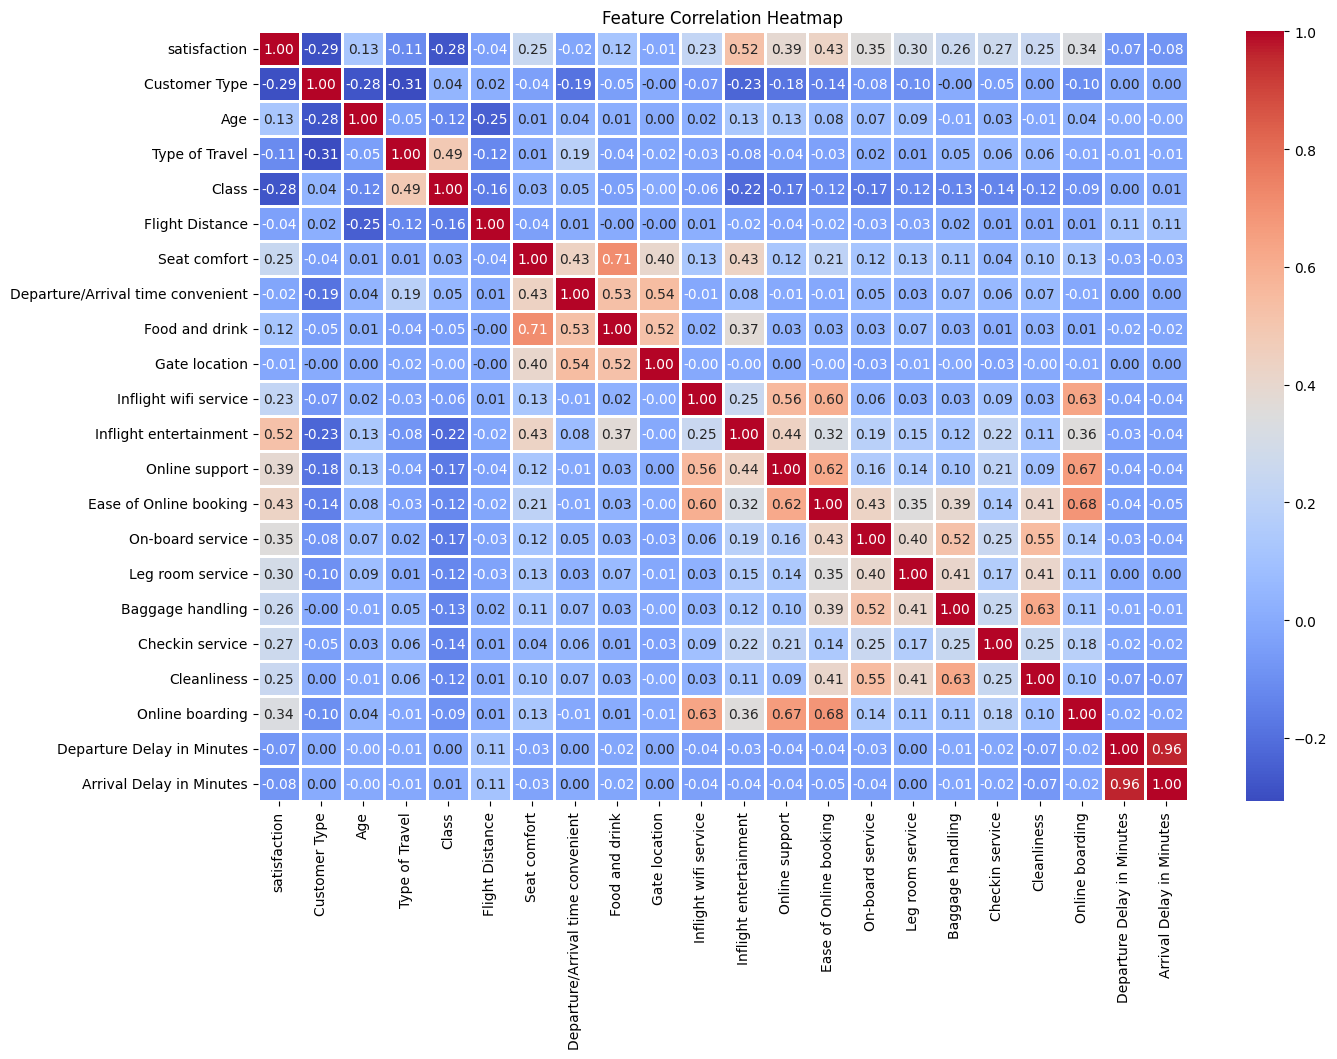

In [25]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.8)
plt.title("Feature Correlation Heatmap")
plt.show()

## Feature Engineering

In [26]:
df['Total Delay'] = df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']

In [27]:
df['Delay Category'] = pd.cut(df['Total Delay'], bins=[-1, 5, 30, np.inf], labels=['Short', 'Moderate', 'Long'])

In [28]:
df['Service Score'] = df[['Seat comfort', 'Food and drink', 'Inflight wifi service', 'Inflight entertainment',
                          'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service',
                          'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']].mean(axis=1)

## Encoding New Categorical Feature

In [29]:
df['Delay Category'] = le.fit_transform(df['Delay Category'])

In [30]:
df['Delay Category'] = le.fit_transform(df['Delay Category'])

## Selecting Features & Target Variable

In [31]:
df.columns

Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Total Delay',
       'Delay Category', 'Service Score'],
      dtype='object')

In [32]:
X = df[['Age', 'Customer Type', 'Type of Travel', 'Class', 'Flight Distance', 'Seat comfort',
        'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service',
        'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service',
        'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
        'Total Delay', 'Delay Category', 'Service Score']]

In [33]:
y = df['satisfaction']

## Splitting Dataset

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardizing Numerical Features

In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2) Model Building and Analysis

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

## Predictions

In [39]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

## Model Evaluation

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [41]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

In [42]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{report}")
print(f"ROC-AUC Score: {roc_auc}")

Accuracy: 0.8312
Confusion Matrix:
[[3669  858]
 [ 830 4643]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      4527
           1       0.84      0.85      0.85      5473

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

ROC-AUC Score: 0.9070276556145191


# Plot ROC Curve

In [43]:
import matplotlib.pyplot as plt

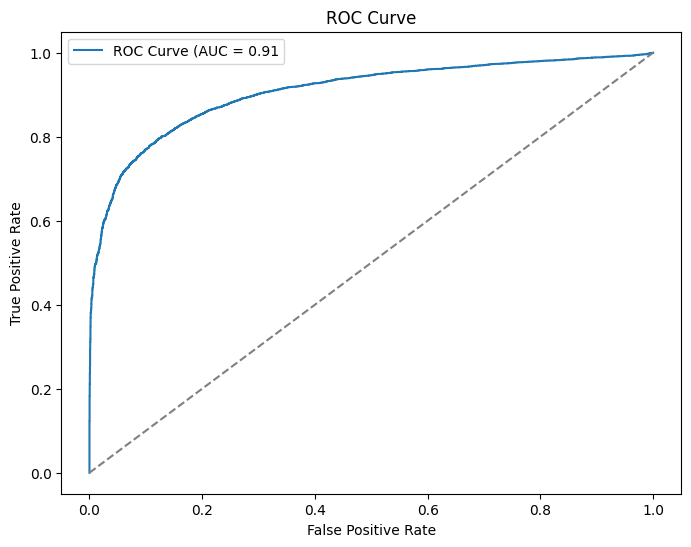

In [44]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()